In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()
# https://www.kaggle.com/datasets/ivansher/nasa-nearest-earth-objects-1910-2024?resource=download


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
%cd /content/drive/MyDrive/DS675

[Errno 2] No such file or directory: '/content/drive/MyDrive/DS675'
/Users/arpitshrotriya


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE

In [ ]:
earth_data = pd.read_csv('nearest-earth-objects.csv')
earth_data.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [ ]:
earth_data.shape

(338199, 9)

In [ ]:
earth_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [ ]:
earth_data.isnull().sum()

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

In [ ]:
earth_data.duplicated().sum()

0

In [ ]:
earth_data["name"].value_counts()

name
277810 (2006 FV35)               211
469219 Kamo`oalewa (2016 HO3)    197
(2014 OL339)                     192
(2017 FZ2)                       186
(2023 FW13)                      169
                                ... 
(2016 SE2)                         1
(2016 RY19)                        1
(2016 RT33)                        1
(2016 RZ33)                        1
(2024 NE)                          1
Name: count, Length: 33514, dtype: int64

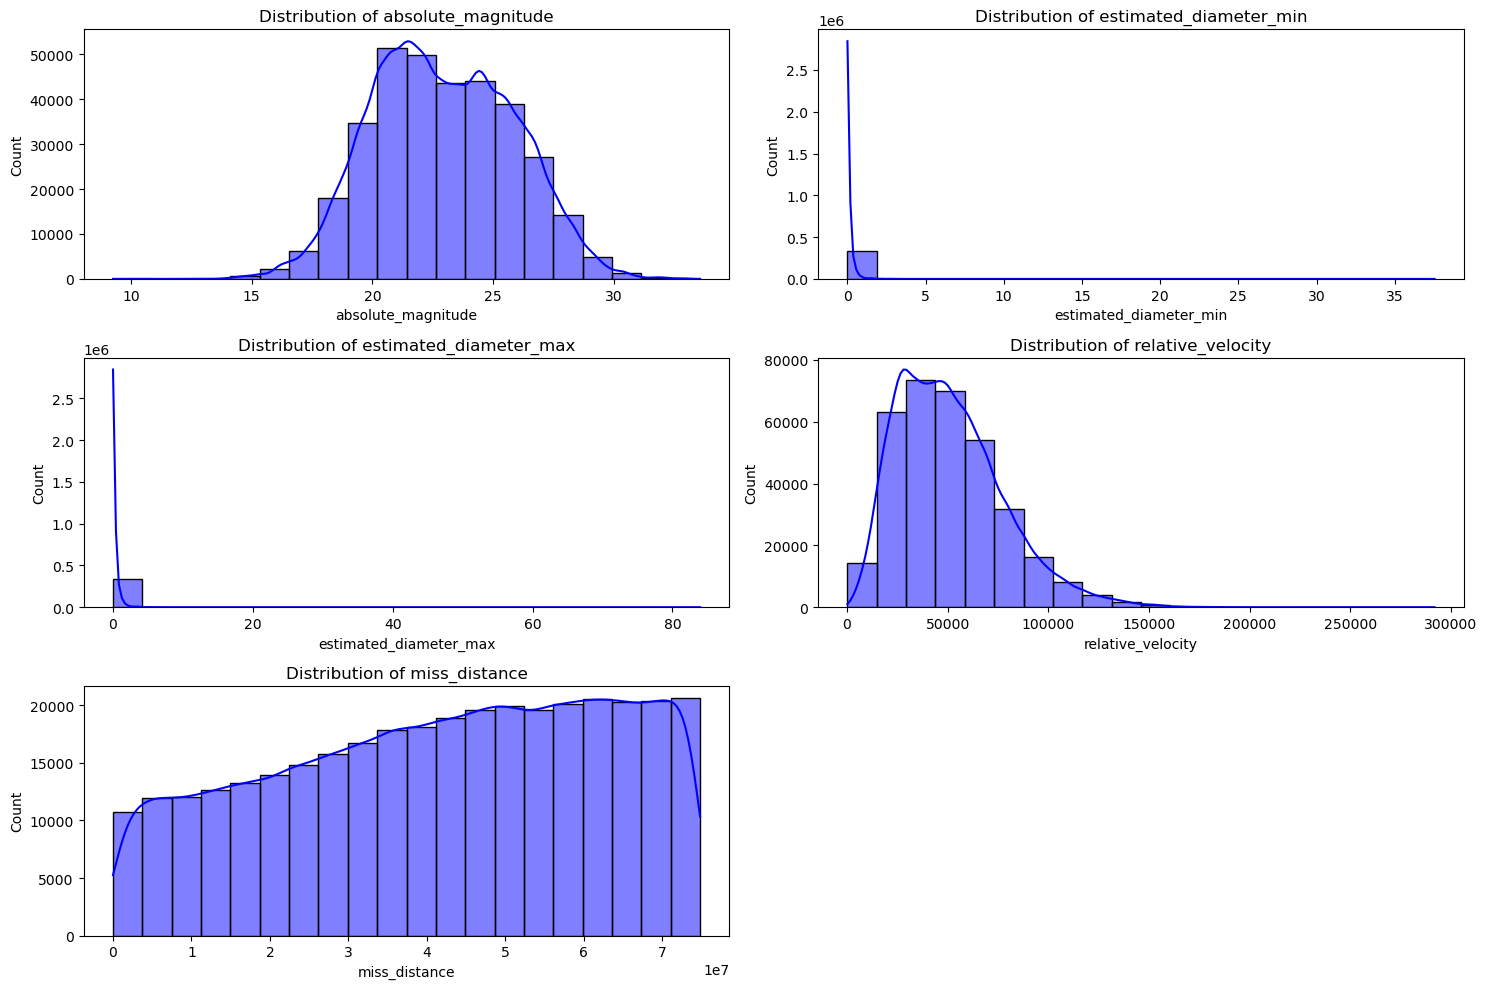

In [ ]:
numerical_features = ["absolute_magnitude", "estimated_diameter_min", "estimated_diameter_max", "relative_velocity", "miss_distance"]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 2, i+1)
    sns.histplot(earth_data[feature], kde=True, bins=20, color='blue')
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

/var/folders/pr/w2vwyyss19358220bftjnk000000gn/T/ipykernel_23409/3692631260.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=earth_data["is_hazardous"], palette="viridis")


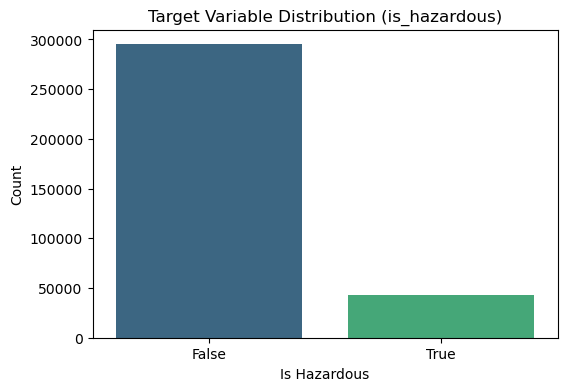

In [ ]:
# Target Variable Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=earth_data["is_hazardous"], palette="viridis")
plt.title("Target Variable Distribution (is_hazardous)")
plt.xlabel("Is Hazardous")
plt.ylabel("Count")
plt.show()

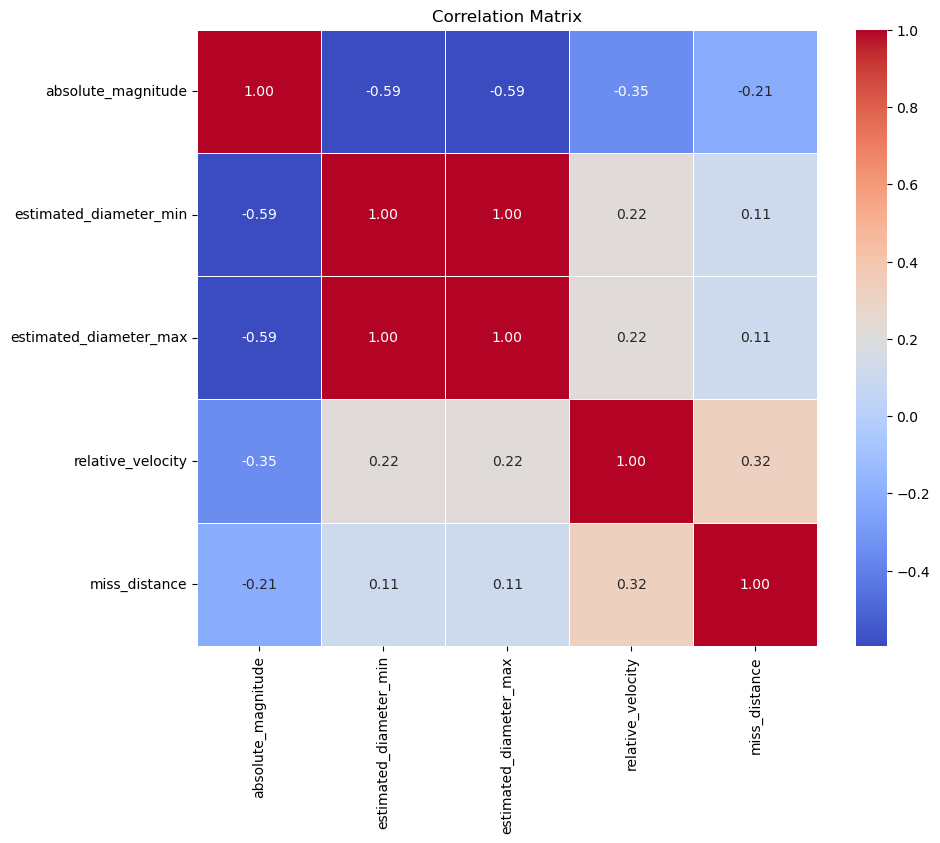

In [ ]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = earth_data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidth=0.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Addressing Class Imbalance
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scikeras.wrappers import KerasClassifier

X = earth_data.drop(columns=["neo_id", "name", "is_hazardous", "orbiting_body"])
y = earth_data["is_hazardous"]

imputer = SimpleImputer(strategy="mean")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
#y = y.dropna()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [ ]:
# RNN Implementation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout

def build_rnn(units=64, dropout_rate=0.3):
    model = Sequential([
        SimpleRNN(units, activation="relu", input_shape=(X_train_rnn.shape[1], 1), return_sequences=True),
        Dropout(dropout_rate),
        SimpleRNN(units, activation="relu"),
        Dropout(dropout_rate),
        Dense(1, activation="sigmoid")
    ])

    # Compile model
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

In [ ]:
# CNN Implementation

from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

def build_cnn(units=64, dropout_rate=0.3):
    model = Sequential([
    Conv1D(units, kernel_size=3, activation="relu", input_shape=(X_train_rnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(dropout_rate),
    Flatten(),
    Dense(units, activation="relu"),
    Dropout(dropout_rate),
    Dense(1, activation="sigmoid")
    ])

    # Compile Model
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model


In [ ]:
# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))
print(f"Class Weights: {class_weights_dict}")

Class Weights: {0: 0.5730264463690099, 1: 3.923417301955585}


In [ ]:
X_train_rnn = np.expand_dims(X_train, axis=2)
X_test_rnn = np.expand_dims(X_test, axis=2)

In [ ]:
# SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_test_smote, y_test_smote = smote.fit_resample(X_test, y_test)

In [ ]:
X_train_rnn_smote = np.expand_dims(X_train_smote, axis=2)
X_test_rnn_smote = np.expand_dims(X_test_smote, axis=2)

In [ ]:
print("Baseline RNN Model:")
rnn_baseline = build_rnn()

# Train model
rnn_baseline.fit(X_train_rnn, y_train, epochs=15, batch_size=32, validation_data=(X_test_rnn, y_test), verbose=1)

# Evaluate model
rnn_eval = rnn_baseline.evaluate(X_test_rnn, y_test, verbose=1)
print(f"RNN Test Loss: {rnn_eval[0]:.4f}, Test Accuracy: {rnn_eval[1]:.4f}")

Baseline RNN Model:
Epoch 1/15


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7399/7399 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8782 - loss: 0.2587 - val_accuracy: 0.8840 - val_loss: 0.2450
Epoch 2/15
7399/7399 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.8841 - loss: 0.2434 - val_accuracy: 0.8837 - val_loss: 0.2431
Epoch 3/15
7399/7399 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.8844 - loss: 0.2416 - val_accuracy: 0.8829 - val_loss: 0.2427
Epoch 4/15
7399/7399 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.8844 - loss: 0.2415 - val_accuracy: 0.8841 - val_loss: 0.2405
Epoch 5/15
7399/7399 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.8839 - loss: 0.2422 - val_accuracy: 0.8848 - val_loss: 0.2396
Epoch 6/15
7399/7399 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.8838 - loss: 0.2419 - val_accuracy: 0.8842 - val_loss: 0.2387
Epoch 7/15
7399/7399 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.8845 - loss: 0.2406 - val_accuracy: 0.8844 - val_loss: 0.2409
Epoch 8/15
7399/7399 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.8840 - loss: 0.2412 - val

In [ ]:
# RNN with SMOTE Model
print("RNN Model with SMOTE:")

rnn_smote = build_rnn()

X_train_rnn_smote = np.expand_dims(X_train_smote.values, axis=2)
rnn_smote.fit(X_train_rnn_smote, y_train_smote, epochs=15, batch_size=32, validation_data=(X_test_smote, y_test_smote), verbose=1)

# Evaluate model
rnn_eval = rnn_smote.evaluate(X_test_smote, y_test_smote, verbose=1)
print(f"RNN With SMOTE Test Loss: {rnn_eval[0]:.4f}, Test Accuracy: {rnn_eval[1]:.4f}")

RNN Model with SMOTE:
Epoch 1/15
12911/12911 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - accuracy: 0.8315 - loss: 0.3719 - val_accuracy: 0.8393 - val_loss: 0.3527
Epoch 2/15
12911/12911 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - accuracy: 0.8382 - loss: 0.3575 - val_accuracy: 0.8396 - val_loss: 0.3538
Epoch 3/15
12911/12911 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - accuracy: 0.8380 - loss: 0.3563 - val_accuracy: 0.8403 - val_loss: 0.3520
Epoch 4/15
12911/12911 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - accuracy: 0.8391 - loss: 0.3544 - val_accuracy: 0.8392 - val_loss: 0.3536
Epoch 5/15
12911/12911 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - accuracy: 0.8383 - loss: 0.3548 - val_accuracy: 0.8401 - val_loss: 0.3510
Epoch 6/15
12911/12911 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - accuracy: 0.8386 - loss: 0.3542 - val_accuracy: 0.8399 - val_loss: 0.3512
Epoch 7/15
12911/12911 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - accuracy: 0.8393 - loss: 0.3536 - val_accuracy: 0.8402 - val_loss: 0.3506
Epoch 8/15
12911/12911 ━━━━━━━━━━━━━━━━━━━━ 19s

In [ ]:
# SMOTE with Hyperparameter Tuning
print("RNN Model with SMOTE and Hyperparameter Tuning:")
rnn_tuner = KerasClassifier(build_fn=build_rnn, units=32, dropout_rate=0.2, epochs=10, batch_size=32, verbose=0)
rnn_param_grid = {"units": [32, 64, 48, 96], "dropout_rate": [0.2, 0.3, 0.1, 0.4, 0.5], "batch_size": [32, 64, 128, 216]}
rnn_search = RandomizedSearchCV(rnn_tuner, param_distributions=rnn_param_grid, n_iter=5, cv=3, random_state=42)
rnn_search.fit(X_train_rnn_smote, y_train_smote, validation_data=(X_test_smote, y_test_smote), class_weight=class_weights_dict, verbose=1)
best_rnn = rnn_search.best_estimator_

RNN Model with SMOTE and Hyperparameter Tuning:
Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4304/4304 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7996 - loss: 0.4329 - val_accuracy: 0.8290 - val_loss: 0.5405
Epoch 2/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8307 - loss: 0.3844 - val_accuracy: 0.8331 - val_loss: 0.4781
Epoch 3/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8317 - loss: 0.3812 - val_accuracy: 0.8285 - val_loss: 0.5538
Epoch 4/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8304 - loss: 0.3816 - val_accuracy: 0.8305 - val_loss: 0.5024
Epoch 5/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8313 - loss: 0.3792 - val_accuracy: 0.8343 - val_loss: 0.5029
Epoch 6/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8316 - loss: 0.3777 - val_accuracy: 0.8346 - val_loss: 0.5153
Epoch 7/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8317 - loss: 0.3769 - val_accuracy: 0.8352 - val_loss: 0.4898
Epoch 8/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8311 - loss: 0.3785 - val_accurac

/opt/anaconda3/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4304/4304 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8005 - loss: 0.4315 - val_accuracy: 0.8346 - val_loss: 0.4756
Epoch 2/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8297 - loss: 0.3868 - val_accuracy: 0.8321 - val_loss: 0.5253
Epoch 3/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8312 - loss: 0.3823 - val_accuracy: 0.8287 - val_loss: 0.5637
Epoch 4/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8309 - loss: 0.3822 - val_accuracy: 0.8338 - val_loss: 0.5236
Epoch 5/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8296 - loss: 0.3832 - val_accuracy: 0.8317 - val_loss: 0.5078
Epoch 6/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8317 - loss: 0.3799 - val_accuracy: 0.8346 - val_loss: 0.5031
Epoch 7/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8307 - loss: 0.3795 - val_accuracy: 0.8343 - val_loss: 0.4944
Epoch 8/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8304 - loss: 0.3791 - val_accurac

/opt/anaconda3/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4304/4304 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8004 - loss: 0.4338 - val_accuracy: 0.8284 - val_loss: 0.5262
Epoch 2/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8292 - loss: 0.3869 - val_accuracy: 0.8323 - val_loss: 0.5068
Epoch 3/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8299 - loss: 0.3848 - val_accuracy: 0.8324 - val_loss: 0.5128
Epoch 4/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8309 - loss: 0.3815 - val_accuracy: 0.8329 - val_loss: 0.5030
Epoch 5/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8302 - loss: 0.3808 - val_accuracy: 0.8319 - val_loss: 0.5150
Epoch 6/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8292 - loss: 0.3826 - val_accuracy: 0.8334 - val_loss: 0.5134
Epoch 7/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8303 - loss: 0.3795 - val_accuracy: 0.8317 - val_loss: 0.5103
Epoch 8/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8296 - loss: 0.3796 - val_accurac

/opt/anaconda3/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8608/8608 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.8107 - loss: 0.4271 - val_accuracy: 0.8338 - val_loss: 0.5061
Epoch 2/10
8608/8608 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.8306 - loss: 0.3864 - val_accuracy: 0.8350 - val_loss: 0.5045
Epoch 3/10
8608/8608 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.8314 - loss: 0.3823 - val_accuracy: 0.8246 - val_loss: 0.5186
Epoch 4/10
8608/8608 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.8298 - loss: 0.3820 - val_accuracy: 0.8342 - val_loss: 0.4940
Epoch 5/10
8608/8608 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.8313 - loss: 0.3799 - val_accuracy: 0.8351 - val_loss: 0.4745
Epoch 6/10
8608/8608 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.8301 - loss: 0.3808 - val_accuracy: 0.8299 - val_loss: 0.5103
Epoch 7/10
8608/8608 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.8303 - loss: 0.3794 - val_accuracy: 0.8339 - val_loss: 0.4958
Epoch 8/10
8608/8608 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.8301 - loss: 0.3791 - val

/opt/anaconda3/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8608/8608 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.8042 - loss: 0.4414 - val_accuracy: 0.8249 - val_loss: 0.5680
Epoch 2/10
8608/8608 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.8268 - loss: 0.3904 - val_accuracy: 0.8325 - val_loss: 0.5116
Epoch 3/10
8608/8608 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.8294 - loss: 0.3852 - val_accuracy: 0.8372 - val_loss: 0.5005
Epoch 4/10
8608/8608 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.8296 - loss: 0.3841 - val_accuracy: 0.8293 - val_loss: 0.5068
Epoch 5/10
8608/8608 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.8282 - loss: 0.3836 - val_accuracy: 0.8262 - val_loss: 0.4930
Epoch 6/10
8608/8608 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.8298 - loss: 0.3799 - val_accuracy: 0.8322 - val_loss: 0.5205
Epoch 7/10
8608/8608 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.8280 - loss: 0.3835 - val_accuracy: 0.8268 - val_loss: 0.5206
Epoch 8/10
8608/8608 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.8291 - loss: 0.3801 - val

/opt/anaconda3/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8608/8608 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.8030 - loss: 0.4382 - val_accuracy: 0.8260 - val_loss: 0.5623
Epoch 2/10
8608/8608 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.8291 - loss: 0.3868 - val_accuracy: 0.8313 - val_loss: 0.5225
Epoch 3/10
8608/8608 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.8281 - loss: 0.3867 - val_accuracy: 0.8314 - val_loss: 0.5099
Epoch 4/10
8608/8608 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.8279 - loss: 0.3856 - val_accuracy: 0.8307 - val_loss: 0.5485
Epoch 5/10
8608/8608 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.8288 - loss: 0.3827 - val_accuracy: 0.8332 - val_loss: 0.5003
Epoch 6/10
8608/8608 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.8300 - loss: 0.3805 - val_accuracy: 0.8293 - val_loss: 0.5302
Epoch 7/10
8608/8608 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.8296 - loss: 0.3801 - val_accuracy: 0.8278 - val_loss: 0.5217
Epoch 8/10
8608/8608 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.8272 - loss: 0.3832 - val

/opt/anaconda3/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4304/4304 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8037 - loss: 0.4358 - val_accuracy: 0.8312 - val_loss: 0.4968
Epoch 2/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8300 - loss: 0.3861 - val_accuracy: 0.8302 - val_loss: 0.5314
Epoch 3/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8321 - loss: 0.3825 - val_accuracy: 0.8275 - val_loss: 0.5056
Epoch 4/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8307 - loss: 0.3821 - val_accuracy: 0.8349 - val_loss: 0.4961
Epoch 5/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8323 - loss: 0.3792 - val_accuracy: 0.8334 - val_loss: 0.5139
Epoch 6/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8323 - loss: 0.3783 - val_accuracy: 0.8311 - val_loss: 0.5260
Epoch 7/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8305 - loss: 0.3808 - val_accuracy: 0.8315 - val_loss: 0.5133
Epoch 8/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8322 - loss: 0.3765 - val_accurac

/opt/anaconda3/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4304/4304 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8017 - loss: 0.4429 - val_accuracy: 0.8279 - val_loss: 0.5053
Epoch 2/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8294 - loss: 0.3880 - val_accuracy: 0.8313 - val_loss: 0.4871
Epoch 3/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8306 - loss: 0.3844 - val_accuracy: 0.8310 - val_loss: 0.4923
Epoch 4/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8291 - loss: 0.3855 - val_accuracy: 0.8306 - val_loss: 0.5206
Epoch 5/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8306 - loss: 0.3823 - val_accuracy: 0.8312 - val_loss: 0.5069
Epoch 6/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8303 - loss: 0.3824 - val_accuracy: 0.8294 - val_loss: 0.5235
Epoch 7/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8301 - loss: 0.3816 - val_accuracy: 0.8297 - val_loss: 0.4971
Epoch 8/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8293 - loss: 0.3798 - val_accurac

/opt/anaconda3/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4304/4304 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7999 - loss: 0.4445 - val_accuracy: 0.8268 - val_loss: 0.5246
Epoch 2/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8294 - loss: 0.3881 - val_accuracy: 0.8353 - val_loss: 0.4787
Epoch 3/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8297 - loss: 0.3857 - val_accuracy: 0.8328 - val_loss: 0.5205
Epoch 4/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8311 - loss: 0.3810 - val_accuracy: 0.8314 - val_loss: 0.5204
Epoch 5/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8305 - loss: 0.3808 - val_accuracy: 0.8304 - val_loss: 0.5134
Epoch 6/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8284 - loss: 0.3829 - val_accuracy: 0.8307 - val_loss: 0.5148
Epoch 7/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8296 - loss: 0.3806 - val_accuracy: 0.8325 - val_loss: 0.5226
Epoch 8/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8307 - loss: 0.3783 - val_accurac

/opt/anaconda3/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4304/4304 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8104 - loss: 0.4189 - val_accuracy: 0.8282 - val_loss: 0.5548
Epoch 2/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8316 - loss: 0.3828 - val_accuracy: 0.8293 - val_loss: 0.5323
Epoch 3/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8302 - loss: 0.3826 - val_accuracy: 0.8331 - val_loss: 0.4846
Epoch 4/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8327 - loss: 0.3774 - val_accuracy: 0.8245 - val_loss: 0.5349
Epoch 5/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8309 - loss: 0.3800 - val_accuracy: 0.8353 - val_loss: 0.5064
Epoch 6/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8327 - loss: 0.3771 - val_accuracy: 0.8290 - val_loss: 0.5002
Epoch 7/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8325 - loss: 0.3757 - val_accuracy: 0.8359 - val_loss: 0.5110
Epoch 8/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8317 - loss: 0.3767 - val

/opt/anaconda3/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4304/4304 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8093 - loss: 0.4184 - val_accuracy: 0.8284 - val_loss: 0.5411
Epoch 2/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8301 - loss: 0.3857 - val_accuracy: 0.8302 - val_loss: 0.5305
Epoch 3/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8317 - loss: 0.3818 - val_accuracy: 0.8323 - val_loss: 0.5168
Epoch 4/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8304 - loss: 0.3830 - val_accuracy: 0.8290 - val_loss: 0.5273
Epoch 5/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8304 - loss: 0.3816 - val_accuracy: 0.8345 - val_loss: 0.5318
Epoch 6/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8313 - loss: 0.3798 - val_accuracy: 0.8262 - val_loss: 0.5094
Epoch 7/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8287 - loss: 0.3804 - val_accuracy: 0.8334 - val_loss: 0.4967
Epoch 8/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8305 - loss: 0.3790 - val

/opt/anaconda3/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4304/4304 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8121 - loss: 0.4168 - val_accuracy: 0.8259 - val_loss: 0.5516
Epoch 2/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8291 - loss: 0.3858 - val_accuracy: 0.8284 - val_loss: 0.5468
Epoch 3/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8325 - loss: 0.3804 - val_accuracy: 0.8300 - val_loss: 0.5324
Epoch 4/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8298 - loss: 0.3836 - val_accuracy: 0.8346 - val_loss: 0.5112
Epoch 5/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8301 - loss: 0.3813 - val_accuracy: 0.8309 - val_loss: 0.5076
Epoch 6/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8311 - loss: 0.3778 - val_accuracy: 0.8322 - val_loss: 0.5131
Epoch 7/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8303 - loss: 0.3797 - val_accuracy: 0.8356 - val_loss: 0.5052
Epoch 8/10
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8310 - loss: 0.3789 - val

/opt/anaconda3/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8608/8608 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.8034 - loss: 0.4484 - val_accuracy: 0.8317 - val_loss: 0.4934
Epoch 2/10
8608/8608 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.8270 - loss: 0.3901 - val_accuracy: 0.8317 - val_loss: 0.5380
Epoch 3/10
8608/8608 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.8262 - loss: 0.3863 - val_accuracy: 0.8271 - val_loss: 0.5100
Epoch 4/10
8608/8608 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.8265 - loss: 0.3856 - val_accuracy: 0.8310 - val_loss: 0.5270
Epoch 5/10
8608/8608 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.8271 - loss: 0.3846 - val_accuracy: 0.8317 - val_loss: 0.5074
Epoch 6/10
8608/8608 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.8267 - loss: 0.3849 - val_accuracy: 0.8324 - val_loss: 0.5138
Epoch 7/10
8608/8608 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.8262 - loss: 0.3853 - val_accuracy: 0.8322 - val_loss: 0.5043
Epoch 8/10
8608/8608 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.8290 - loss: 0.3809 - val

/opt/anaconda3/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8608/8608 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.8059 - loss: 0.4510 - val_accuracy: 0.8323 - val_loss: 0.4953
Epoch 2/10
8608/8608 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.8227 - loss: 0.3962 - val_accuracy: 0.8300 - val_loss: 0.5213
Epoch 3/10
8608/8608 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.8251 - loss: 0.3891 - val_accuracy: 0.8305 - val_loss: 0.5026
Epoch 4/10
8608/8608 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.8270 - loss: 0.3852 - val_accuracy: 0.8331 - val_loss: 0.4953
Epoch 5/10
8608/8608 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.8260 - loss: 0.3868 - val_accuracy: 0.8307 - val_loss: 0.5147
Epoch 6/10
8608/8608 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.8263 - loss: 0.3864 - val_accuracy: 0.8348 - val_loss: 0.5027
Epoch 7/10
8608/8608 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.8263 - loss: 0.3866 - val_accuracy: 0.8269 - val_loss: 0.5222
Epoch 8/10
8608/8608 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.8256 - loss: 0.3859 - val

/opt/anaconda3/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8608/8608 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.8009 - loss: 0.4589 - val_accuracy: 0.8263 - val_loss: 0.5036
Epoch 2/10
8608/8608 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.8254 - loss: 0.3923 - val_accuracy: 0.8310 - val_loss: 0.4925
Epoch 3/10
8608/8608 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.8258 - loss: 0.3888 - val_accuracy: 0.8289 - val_loss: 0.5246
Epoch 4/10
8608/8608 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.8249 - loss: 0.3882 - val_accuracy: 0.8278 - val_loss: 0.5142
Epoch 5/10
8608/8608 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.8244 - loss: 0.3880 - val_accuracy: 0.8292 - val_loss: 0.5171
Epoch 6/10
8608/8608 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.8256 - loss: 0.3863 - val_accuracy: 0.8279 - val_loss: 0.5246
Epoch 7/10
8608/8608 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.8268 - loss: 0.3850 - val_accuracy: 0.8271 - val_loss: 0.5080
Epoch 8/10
8608/8608 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.8250 - loss: 0.3869 - val

/opt/anaconda3/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6456/6456 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8153 - loss: 0.4109 - val_accuracy: 0.8318 - val_loss: 0.5187
Epoch 2/10
6456/6456 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8322 - loss: 0.3814 - val_accuracy: 0.8344 - val_loss: 0.5170
Epoch 3/10
6456/6456 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8324 - loss: 0.3791 - val_accuracy: 0.8322 - val_loss: 0.5018
Epoch 4/10
6456/6456 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8300 - loss: 0.3812 - val_accuracy: 0.8326 - val_loss: 0.5028
Epoch 5/10
6456/6456 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8305 - loss: 0.3784 - val_accuracy: 0.8350 - val_loss: 0.4864
Epoch 6/10
6456/6456 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8313 - loss: 0.3774 - val_accuracy: 0.8344 - val_loss: 0.5055
Epoch 7/10
6456/6456 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8302 - loss: 0.3789 - val_accuracy: 0.8295 - val_loss: 0.5107
Epoch 8/10
6456/6456 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.8309 - loss: 0.3768 - val

In [ ]:
print("Best Parameters Found:")
print(rnn_search.best_params_)

Best Parameters Found:
{'units': 48, 'dropout_rate': 0.1, 'batch_size': 64}


In [ ]:
# CNN Implementation

print("Baseline CNN Model:")
cnn_baseline = build_cnn()

# Train Model
cnn_baseline.fit(X_train_rnn, y_train, epochs=15, batch_size=64, verbose=1, validation_data=(X_test_rnn, y_test))

# Evaluate Model
cnn_eval = cnn_baseline.evaluate(X_test_rnn, y_test, verbose=1)
print(f"CNN Test Loss: {cnn_eval[0]:.4f}, Test Accuracy: {cnn_eval[1]:.4f}")

Baseline CNN Model:
Epoch 1/15


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3700/3700 ━━━━━━━━━━━━━━━━━━━━ 3s 716us/step - accuracy: 0.8728 - loss: 0.2866 - val_accuracy: 0.8719 - val_loss: 0.2559
Epoch 2/15
3700/3700 ━━━━━━━━━━━━━━━━━━━━ 2s 652us/step - accuracy: 0.8727 - loss: 0.2575 - val_accuracy: 0.8721 - val_loss: 0.2554
Epoch 3/15
3700/3700 ━━━━━━━━━━━━━━━━━━━━ 2s 654us/step - accuracy: 0.8727 - loss: 0.2561 - val_accuracy: 0.8721 - val_loss: 0.2537
Epoch 4/15
3700/3700 ━━━━━━━━━━━━━━━━━━━━ 2s 661us/step - accuracy: 0.8739 - loss: 0.2540 - val_accuracy: 0.8723 - val_loss: 0.2539
Epoch 5/15
3700/3700 ━━━━━━━━━━━━━━━━━━━━ 2s 671us/step - accuracy: 0.8728 - loss: 0.2548 - val_accuracy: 0.8722 - val_loss: 0.2537
Epoch 6/15
3700/3700 ━━━━━━━━━━━━━━━━━━━━ 3s 693us/step - accuracy: 0.8742 - loss: 0.2534 - val_accuracy: 0.8723 - val_loss: 0.2541
Epoch 7/15
3700/3700 ━━━━━━━━━━━━━━━━━━━━ 3s 693us/step - accuracy: 0.8727 - loss: 0.2552 - val_accuracy: 0.8722 - val_loss: 0.2546
Epoch 8/15
3700/3700 ━━━━━━━━━━━━━━━━━━━━ 2s 652us/step - accuracy: 0.8737 - loss: 0.25

In [ ]:
print("CNN Model with SMOTE:")
cnn_smote = build_cnn()
cnn_smote.fit(X_train_rnn_smote, y_train_smote, epochs=10, batch_size=32, verbose=1, validation_data=(X_test_smote, y_test_smote))

# Evaluate Model
cnn_eval = cnn_smote.evaluate(X_test_smote, y_test_smote, verbose=1)
print(f"CNN Test Loss: {cnn_eval[0]:.4f}, Test Accuracy: {cnn_eval[1]:.4f}")

CNN Model with SMOTE:
Epoch 1/10
12911/12911 ━━━━━━━━━━━━━━━━━━━━ 8s 606us/step - accuracy: 0.8219 - loss: 0.3987 - val_accuracy: 0.8395 - val_loss: 0.3685
Epoch 2/10
12911/12911 ━━━━━━━━━━━━━━━━━━━━ 8s 601us/step - accuracy: 0.8371 - loss: 0.3724 - val_accuracy: 0.8387 - val_loss: 0.3684
Epoch 3/10
12911/12911 ━━━━━━━━━━━━━━━━━━━━ 8s 595us/step - accuracy: 0.8373 - loss: 0.3718 - val_accuracy: 0.8394 - val_loss: 0.3677
Epoch 4/10
12911/12911 ━━━━━━━━━━━━━━━━━━━━ 8s 600us/step - accuracy: 0.8370 - loss: 0.3717 - val_accuracy: 0.8400 - val_loss: 0.3676
Epoch 5/10
12911/12911 ━━━━━━━━━━━━━━━━━━━━ 8s 601us/step - accuracy: 0.8369 - loss: 0.3712 - val_accuracy: 0.8396 - val_loss: 0.3670
Epoch 6/10
12911/12911 ━━━━━━━━━━━━━━━━━━━━ 8s 602us/step - accuracy: 0.8372 - loss: 0.3712 - val_accuracy: 0.8391 - val_loss: 0.3671
Epoch 7/10
12911/12911 ━━━━━━━━━━━━━━━━━━━━ 8s 592us/step - accuracy: 0.8367 - loss: 0.3718 - val_accuracy: 0.8387 - val_loss: 0.3677
Epoch 8/10
12911/12911 ━━━━━━━━━━━━━━━━━

In [ ]:
# print("CNN Model with SMOTE and Hyperparameter Tuning:")
# cnn_tuner = KerasClassifier(build_fn=build_cnn, filters=32, kernel_size=3, epochs=10, batch_size=32, dropout_rate=0.2, verbose=1)
# cnn_param_grid = {"units": [48, 64, 78, 96], "kernel_size": [3, 5, 7, 9, 11], "dropout_rate": [0.2, 0.3, 0.5, 0,1], "batch_size": [32, 64, 48, 128, 96]}
# cnn_search = RandomizedSearchCV(cnn_tuner, param_distributions=cnn_param_grid, n_iter=5, cv=3, random_state=42)
# cnn_search.fit(X_train_rnn_smote, y_train_smote, verbose=1)
# best_cnn = cnn_search.best_estimator_

3171/3171 ━━━━━━━━━━━━━━━━━━━━ 1s 426us/step


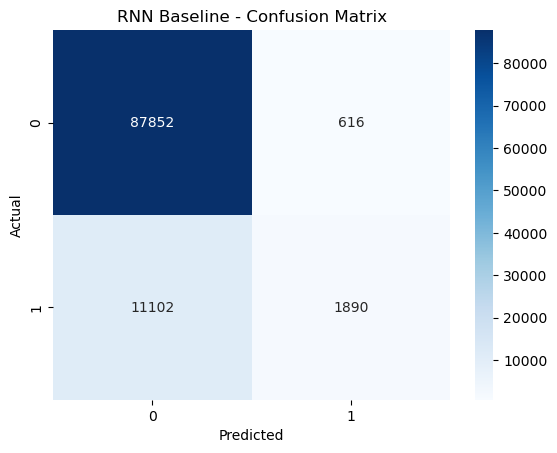

In [ ]:
# Performance Metrics for Baseline RNN

# Predictions for RNN
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
y_pred_rnn = rnn_baseline.predict(X_test_rnn)
y_pred_rnn_class = (y_pred_rnn > 0.5).astype(int)

# RNN Confusion Matrix
cm_rnn = confusion_matrix(y_test, y_pred_rnn_class)
sns.heatmap(cm_rnn, annot=True, fmt="d", cmap="Blues")
plt.title("RNN Baseline - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Classification Report for RNN Baseline Model
              precision    recall  f1-score   support

       False       0.89      0.99      0.94     88468
        True       0.75      0.15      0.24     12992

    accuracy                           0.88    101460
   macro avg       0.82      0.57      0.59    101460
weighted avg       0.87      0.88      0.85    101460



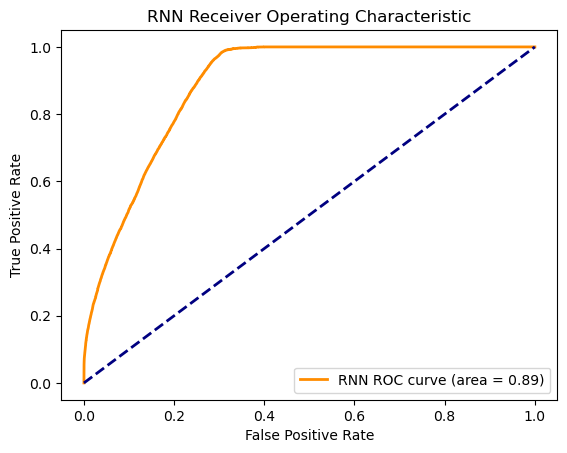

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, f1_score
# RNN Classification Report
print("Classification Report for RNN Baseline Model")
print(classification_report(y_test, y_pred_rnn_class))

# RNN ROC Curve
fpr_rnn, tpr_rnn, _ = roc_curve(y_test, y_pred_rnn)
roc_auc_rnn = auc(fpr_rnn, tpr_rnn)

plt.figure()
plt.plot(fpr_rnn, tpr_rnn, color='darkorange', lw=2, label=f'RNN ROC curve (area = {roc_auc_rnn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RNN Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

5530/5530 ━━━━━━━━━━━━━━━━━━━━ 2s 411us/step


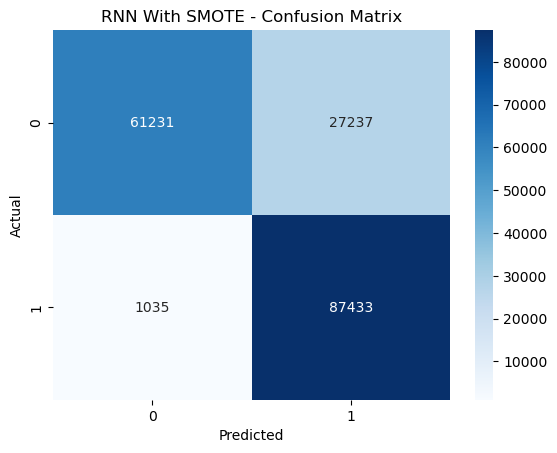

In [ ]:
# Performance Metrics for RNN With SMOTE

# Predictions for RNN
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
y_pred_rnn = rnn_smote.predict(X_test_smote)
y_pred_rnn_class = (y_pred_rnn > 0.5).astype(int)

# RNN Confusion Matrix
cm_rnn = confusion_matrix(y_test_smote, y_pred_rnn_class)
sns.heatmap(cm_rnn, annot=True, fmt="d", cmap="Blues")
plt.title("RNN With SMOTE - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Classification Report for RNN With SMOTE Model
              precision    recall  f1-score   support

       False       0.98      0.69      0.81     88468
        True       0.76      0.99      0.86     88468

    accuracy                           0.84    176936
   macro avg       0.87      0.84      0.84    176936
weighted avg       0.87      0.84      0.84    176936



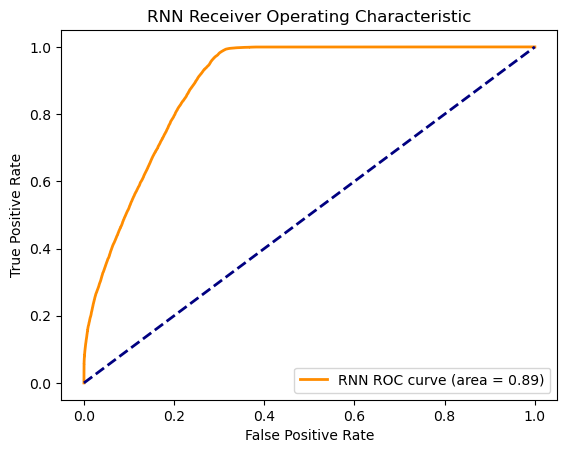

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, f1_score
# RNN Classification Report
print("Classification Report for RNN With SMOTE Model")
print(classification_report(y_test_smote, y_pred_rnn_class))

# RNN ROC Curve
fpr_rnn, tpr_rnn, _ = roc_curve(y_test_smote, y_pred_rnn)
roc_auc_rnn = auc(fpr_rnn, tpr_rnn)

plt.figure()
plt.plot(fpr_rnn, tpr_rnn, color='darkorange', lw=2, label=f'RNN ROC curve (area = {roc_auc_rnn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RNN Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

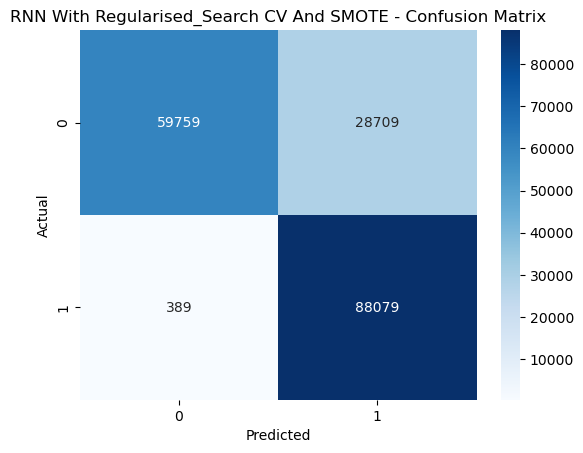

In [ ]:
# Performance Metrics for Hyperparameter Tuned With SMOTE RNN

# Predictions for RNN
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
y_pred_rnn = rnn_search.predict(X_test_rnn_smote)
y_pred_rnn_class = (y_pred_rnn > 0.5).astype(int)

# RNN Confusion Matrix
cm_rnn = confusion_matrix(y_test_smote, y_pred_rnn_class)
sns.heatmap(cm_rnn, annot=True, fmt="d", cmap="Blues")
plt.title("RNN With Regularised_Search CV And SMOTE - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Classification Report for RNN With Regularised_Search CV And SMOTE
              precision    recall  f1-score   support

       False       0.99      0.68      0.80     88468
        True       0.75      1.00      0.86     88468

    accuracy                           0.84    176936
   macro avg       0.87      0.84      0.83    176936
weighted avg       0.87      0.84      0.83    176936



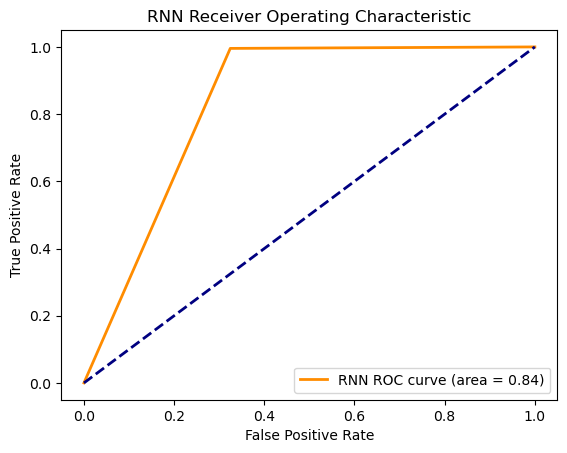

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, f1_score
# RNN Classification Report
print("Classification Report for RNN With Regularised_Search CV And SMOTE")
print(classification_report(y_test_smote, y_pred_rnn_class))

# RNN ROC Curve
fpr_rnn, tpr_rnn, _ = roc_curve(y_test_smote, y_pred_rnn_class)
roc_auc_rnn = auc(fpr_rnn, tpr_rnn)

plt.figure()
plt.plot(fpr_rnn, tpr_rnn, color='darkorange', lw=2, label=f'RNN ROC curve (area = {roc_auc_rnn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RNN Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

3171/3171 ━━━━━━━━━━━━━━━━━━━━ 1s 230us/step


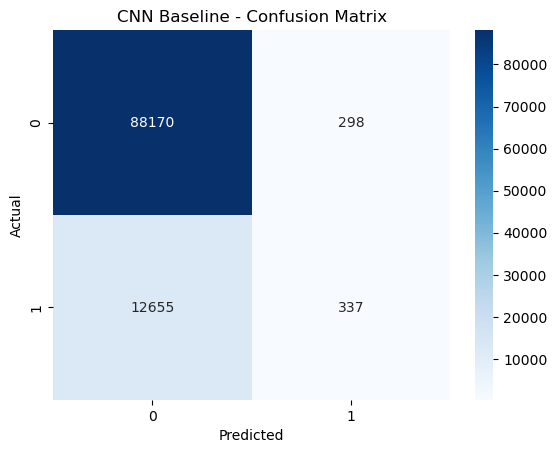

In [ ]:
# Performance Metrics for CNN
# Predict probabilities for CNN

y_pred_cnn = cnn_baseline.predict(X_test_rnn)
y_pred_cnn_class = (y_pred_cnn > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_cnn_class)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("CNN Baseline - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Classification report
print("Classification Report for CNN:")
print(classification_report(y_test, y_pred_cnn_class))

Classification Report for CNN:
              precision    recall  f1-score   support

       False       0.87      1.00      0.93     88468
        True       0.53      0.03      0.05     12992

    accuracy                           0.87    101460
   macro avg       0.70      0.51      0.49    101460
weighted avg       0.83      0.87      0.82    101460



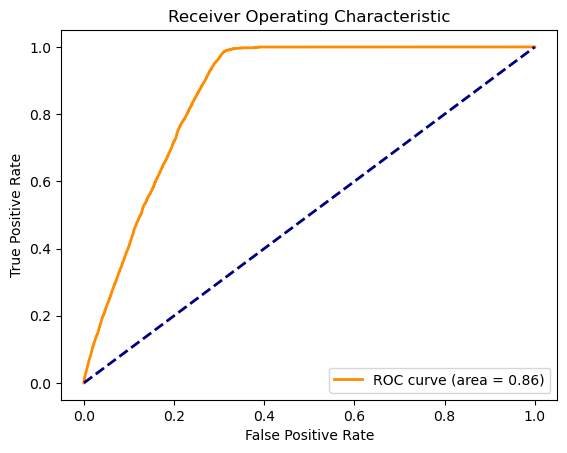

In [ ]:
# Plot ROC Curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_cnn)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

5530/5530 ━━━━━━━━━━━━━━━━━━━━ 1s 222us/step


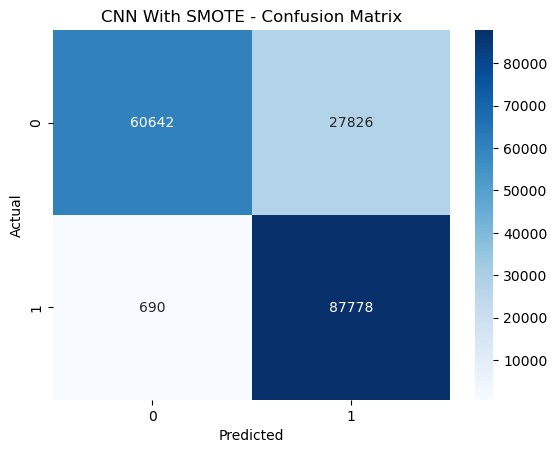

In [ ]:
# Performance Metrics for CNN With SMOTE
# Predict probabilities for CNN With SMOTE

y_pred_cnn = cnn_smote.predict(X_test_rnn_smote)
y_pred_cnn_class = (y_pred_cnn > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test_smote, y_pred_cnn_class)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("CNN With SMOTE - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Classification report
print("Classification Report for CNN With SMOTE:")
print(classification_report(y_test_smote, y_pred_cnn_class))

Classification Report for CNN With SMOTE:
              precision    recall  f1-score   support

       False       0.99      0.69      0.81     88468
        True       0.76      0.99      0.86     88468

    accuracy                           0.84    176936
   macro avg       0.87      0.84      0.83    176936
weighted avg       0.87      0.84      0.83    176936



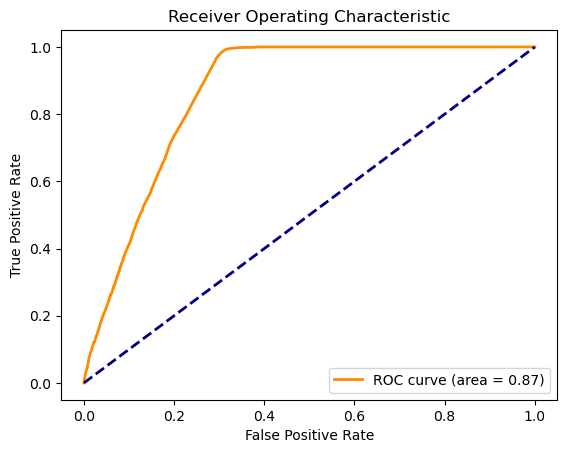

In [ ]:
# Plot ROC Curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test_smote, y_pred_cnn)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
X_test_rnn.shape

(101460, 5, 1)